In [1]:
import os
path = os.path.abspath(os.getcwd())
print(path)
folder = os.path.split(path)[-1]
if folder == 'Subjects_Scripts':
    print('Subjects_Scripts')
    %run my_imports.py
elif folder == 'BREATHING_PROJECT_BIDS':
    print('BREATHING_PROJECT_BIDS')
    %run my_imports.py

C:\Users\bastien\Documents\Git\python_analysis_2\project\BREATHING_PROJECT_BIDS
BREATHING_PROJECT_BIDS


In [2]:
from mne_bids import BIDSPath, read_raw_bids, print_dir_tree, make_report

In [4]:
bids_root = r'D:\DataSet\MNE-test-data-bids'
datatype = 'eeg'
subject = 's25'
session = '01'
task = 'mi'
run_list = ['00','01','02','03','04','05']
raws_list = []
for run in run_list:
    bids_path = BIDSPath(subject=subject,session=session, task=task,run=run,
                     datatype=datatype, root=bids_root)
    raw = read_raw_bids(bids_path=bids_path, verbose=False)
    raws_list.append(raw)

Extracting parameters from D:\DataSet\MNE-test-data-bids\sub-s25\ses-01\eeg\sub-s25_ses-01_task-mi_run-00_eeg.vhdr...
Setting channel info structure...
Reading channel info from D:\DataSet\MNE-test-data-bids\sub-s25\ses-01\eeg\sub-s25_ses-01_task-mi_run-00_channels.tsv.
Extracting parameters from D:\DataSet\MNE-test-data-bids\sub-s25\ses-01\eeg\sub-s25_ses-01_task-mi_run-01_eeg.vhdr...
Setting channel info structure...
Reading events from D:\DataSet\MNE-test-data-bids\sub-s25\ses-01\eeg\sub-s25_ses-01_task-mi_run-01_events.tsv.
Reading channel info from D:\DataSet\MNE-test-data-bids\sub-s25\ses-01\eeg\sub-s25_ses-01_task-mi_run-01_channels.tsv.
Extracting parameters from D:\DataSet\MNE-test-data-bids\sub-s25\ses-01\eeg\sub-s25_ses-01_task-mi_run-02_eeg.vhdr...
Setting channel info structure...
Reading events from D:\DataSet\MNE-test-data-bids\sub-s25\ses-01\eeg\sub-s25_ses-01_task-mi_run-02_events.tsv.
Reading channel info from D:\DataSet\MNE-test-data-bids\sub-s25\ses-01\eeg\sub-s25_s

In [5]:
print(raws_list)
raws = mne.concatenate_raws(raws_list)
events,event_id = mne.events_from_annotations(raws)

[<RawBrainVision | sub-s25_ses-01_task-mi_run-00_eeg.eeg, 66 x 92838 (181.3 s), ~71 kB, data not loaded>, <RawBrainVision | sub-s25_ses-01_task-mi_run-01_eeg.eeg, 66 x 204298 (399.0 s), ~71 kB, data not loaded>, <RawBrainVision | sub-s25_ses-01_task-mi_run-02_eeg.eeg, 66 x 218850 (427.4 s), ~71 kB, data not loaded>, <RawBrainVision | sub-s25_ses-01_task-mi_run-03_eeg.eeg, 66 x 197762 (386.3 s), ~71 kB, data not loaded>, <RawBrainVision | sub-s25_ses-01_task-mi_run-04_eeg.eeg, 66 x 198259 (387.2 s), ~71 kB, data not loaded>, <RawBrainVision | sub-s25_ses-01_task-mi_run-05_eeg.eeg, 66 x 199905 (390.4 s), ~71 kB, data not loaded>]
Used Annotations descriptions: ['HOLD', 'MI_START', 'MI_START_EXHALE', 'MI_START_INHALE', 'MI_STOP', 'MI_STOP_EXHALE', 'MI_STOP_INHALE', 'RELAX', 'START', 'START_TASK']


In [7]:

montageFile = os.path.join(folderAnalysis,'locFile','montageANT64_inverse_v23.txt')
layoutFile  = os.path.join(folderAnalysis,'locFile','antneuro_64ch.lay')
chan_dict_file = os.path.join(folderAnalysis,'locfile','chan_dict_64ANT.txt')

f = open(chan_dict_file,'r')
chan_dict = eval(f.read())
     
cfg= {'spatial_filter': 'CAR',
'montage_file':montageFile,
'layout_file':layoutFile}

scale = dict(mag=1e-12, grad=4e-11, eeg=100, eog=150, ecg=500,
     emg=1e3, ref_meg=1e-12, misc=1e-3, stim=1,
     resp=1e3, chpi=1e-4, whitened=1e2)

if 'AUX3' in raws.ch_names and 'AUX19' in raws.ch_names:
    print("1")
    resp_chan = "AUX3"
    mapping_channel_type = {'EOG':'eog','AUX3':'resp','AUX19':'ecg','M1':'emg','M2':'emg'}
elif 'AUX3' in raws.ch_names and 'AUX13' in raws.ch_names:
    print("2")
    resp_chan = "AUX3"
    mapping_channel_type = {'EOG':'eog','AUX3':'resp','AUX13':'ecg','M1':'emg','M2':'emg'}
elif 'AUX3' in raws.ch_names and 'AUX7' in raws.ch_names:
    print("3")
    resp_chan = "AUX3"
    mapping_channel_type = {'EOG':'eog','AUX3':'resp','AUX7':'ecg','M1':'emg','M2':'emg'}
elif 'AUX19' in raws.ch_names and 'AUX20' in raws.ch_names:
    print("4")
    resp_chan = "AUX19"
    if 'EOG' in raws.ch_names:
        mapping_channel_type = {'EOG':'eog','AUX19':'resp','AUX20':'ecg','M1':'emg','M2':'emg'}
    else:
        mapping_channel_type = {'AUX19':'resp','AUX20':'ecg','M1':'emg','M2':'emg'}
        
elif 'AUX3' in raws.ch_names:
    print("5")
    resp_chan = "AUX3"
    mapping_channel_type = {'TRIGGER':'stim','EOG':'eog','AUX3':'resp','M1':'emg','M2':'emg'}
    
raws.set_channel_types(mapping_channel_type)

print('[Preprocessing] Preprocessed Data')

print('[Events Visualization] Checking events')
print(np.unique(events[:,2]))
print('[Events Visualization] Define dictionary for epoching')
    
listEventOfInterest = {'CUE_START_INHALE':43,
                 'CUE_START_EXHALE':44,
                 'CUE_STOP_INHALE':50,
                 'CUE_STOP_EXHALE':51}

# Clean channel names to be able to use a standard 1005 montage
new_names = dict(
    (ch_name,
     ch_name.rstrip('.').upper().replace('Z', 'z').replace('FP', 'Fp'))
    for ch_name in raws.ch_names)
raws.rename_channels(new_names)

4
[Preprocessing] Preprocessed Data
[Events Visualization] Checking events
[10001 10002 10003 10004 10005 10006 10007 10008 10009 10010]
[Events Visualization] Define dictionary for epoching


<RawBrainVision | sub-s25_ses-01_task-mi_run-00_eeg.eeg, 66 x 1111912 (2171.7 s), ~71 kB, data not loaded>

In [9]:
raws = set_montage_from_file_mne_v23(raws,cfg,kind='topomap')
raws.load_data()
# layout_from_raw = mne.channels.find_layout(raws.info, ch_type='eeg')
# layout_from_raw.plot()|

Reading 0 ... 1111911  =      0.000 ...  2171.701 secs...


<RawBrainVision | sub-s25_ses-01_task-mi_run-00_eeg.eeg, 66 x 1111912 (2171.7 s), ~560.0 MB, data loaded>

In [11]:
from mne.preprocessing import ICA
method = 'fastica'

# Choose other parameters
n_components = 61  # if float, select n_components by explained variance of PCA
decim = 3  # we need sufficient statistics, not all time points -> saves time

# we will also set state of the random number generator - ICA is a
# non-deterministic algorithm, but we want to have the same decomposition
# and the same order of components each time this tutorial is run
random_state = 23
ica = ICA(n_components=n_components, method=method, random_state=random_state)
print(ica)

# Apply Temporal Filtering
picks_eeg = mne.pick_types(raws.info,eeg=True)
raws_filtered = raws.copy()
raws_filtered = raws_filtered.pick(picks_eeg)
raws_filtered.filter(l_freq =1,h_freq = 40)
print('[Preprocessing] Temporal Filtering applied on data (Step 1/3)')

listEventOfInterest = {'MI_START':10002}
epochs  = mne.Epochs(raws_filtered, events, event_id=listEventOfInterest,
                         tmin=-8, tmax=6,baseline=None, preload = True)
ica.fit(epochs, picks='eeg', decim=decim)
print(ica)

<ICA | no decomposition, fit (fastica):  samples, no dimension reduction>
Filtering raw data in 6 contiguous segments
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 sec)

[Preprocessing] Temporal Filtering applied on data (Step 1/3)
Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Loading data for 60 events and 7169 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting

In [12]:
ica.exclude.extend([0,1])
raws_ICA = ica.apply(raws_filtered)
print('[Preprocessing] Apply ICA on data (Step 2/3)')

Applying ICA to Raw instance
    Transforming to ICA space (61 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
[Preprocessing] Apply ICA on data (Step 2/3)


In [14]:
# Apply Spatial Filtering
picks_eeg = mne.pick_types(raws.info,eeg=True)
raws_preprocessed = raws_ICA.copy()
# raws_preprocessed = raws_preprocessed.pick(picks_eeg)
raws_ERDS  = apply_spatial_filter(raws_preprocessed,spatial_filer='CAR')
print('[Preprocessing] Spatial Filtering applied on data (Step 2/3)')

[Preprocessing] Spatial Filtering applied on data (Step 2/3)


Effective window size : 4.000 (s)


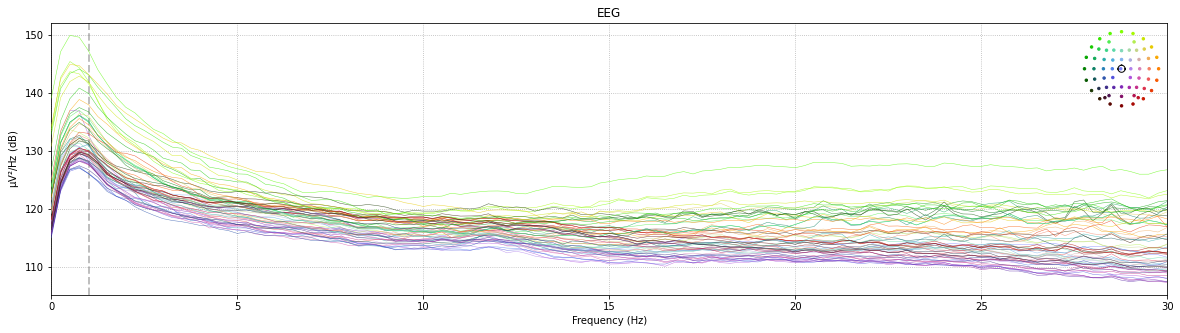

In [15]:
fig = plt.figure(figsize=(20,5))
axs=fig.add_subplot(111)
fig = raws_ERDS.plot_psd(fmin=0,fmax=30,dB =True,ax = axs)

#event_type = 'signal_quality'
#path = os.path.join(folderSubject,'Signal_Quality')
#saving_figure(event_type,path,fig)

# Compute ERD/S

In [16]:
epochs_ERDS = mne.Epochs(raws_ERDS, events, event_id=listEventOfInterest,
                    tmin=-4, tmax=6,baseline=None, preload = True)
baseline = (-2,0)
power = []
Power_events = dict()
for i,event_type in enumerate(epochs_ERDS.event_id): 
    print(event_type)
    power = compute_ERDS(epochs_ERDS[event_type],baseline,mode='logratio')
    Power_events.update({event_type:power})

Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Loading data for 60 events and 5121 original time points ...
0 bad epochs dropped
MI_START
Not setting metadata
Applying baseline correction (mode: logratio)


# Topoplot over time

[-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4. ]
MI_START


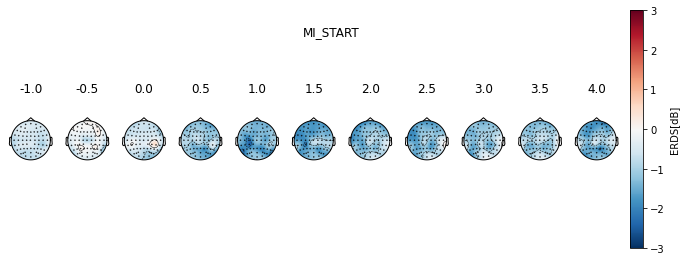

In [25]:
from visualization.plotting import compute_ERDS

baseline = (-1,0)
timeOfInterest = np.arange(-1,4.5,0.5)
print(timeOfInterest)
fmin,fmax = 8,12   
my_cmap_r = reverse_colourmap(plt.cm.RdBu, name = 'RdBu')
path = os.path.join(folderSubject,'topoplot_mu_band')
for i,event_type in enumerate(epochs_ERDS.event_id): 
    print(event_type)
    power = Power_events[event_type]
    fig = plot_topoplot_over_time(power.average(),
                                  timeOfInterest,fmin,fmax,
                                  title=event_type,cmap_use=my_cmap_r,
                                  scale=[-3,3])
#     saving_figure(event_type,path,fig)

# BandPower Analysis

In [34]:

iter_freqs = [
('Mu', 8, 12),
  ('Beta', 13, 30),
]

listEventOfInterest = {'MI_START':40,
               'MI_STOP':55}

tmin, tmax = -2., 5.
baseline = (-2,0)
frequency_map = list()
channelsOfInterest = ['FC3','C3','CP3']
picks_bandpower = mne.pick_channels(raws_ERDS.ch_names,channelsOfInterest)
raws_preprocessed = raws_preprocessed.pick(picks_bandpower)

for band, fmin, fmax in iter_freqs:
    # bandpass filter
    raws_filterband = raws.copy()
    raws_filterband.filter(fmin, fmax, n_jobs=1,  # use more jobs to speed up.
               l_trans_bandwidth=1,  # make sure filter params are the same
               h_trans_bandwidth=1)  # in each band and skip "auto" option.
    
    epochs_filterband = mne.Epochs(raws_filterband, events, listEventOfInterest, tmin, tmax, baseline=baseline,preload=True)
    # remove evoked response
    epochs_filterband.subtract_evoked()
    # get analytic signal (envelope)
    epochs_filterband.apply_hilbert(envelope=True)
    frequency_map.append(((band, fmin, fmax), epochs_filterband.average()))
    del epochs_filterband
del raws_filterband

# Saving Data


In [51]:
saving_var('epochs_ERDS_START',folderSubject,epochs_ERDS)
saving_var('frequency_map',folderSubject,frequency_map)